# CAPSTONE PROJECT: SUSHI RESTAURANT IN MILAN

## INTRODUCTION & BUSINESS UNDERSTANDING

Milan is probably the most international city in Italy and for few years one of the most trendy restaurant type is Sushi.
For this reason the idea behind this problem is: if an investor wants to open a new Sushi restaurant, where would be the optimal location/neighborhood?

In such a problem many variables could play a vital role;
then, in this notebook the key assumptios are: 1) We are considering 88 NIL (Nuclei di Identità Locale) which are the statistica neighborhood of Milan; 2) The locations (Latitude & Longitude) are going to be retrived from Geopy 3) Total Spending Power is the KPI we are interested as a proxy of the overall wealth of the NIL; 4) we will use Foursquare API to register key locations for each NIL; 5) To compare every NIL and for the clustering processes we are going to use the % of Sushi Restaurants on the overall restaurants


## DATA

For all the above assumption, I will deep dive regarding data sources, needs & missing information:
1. The municipal entity of Milan offer an amazing portal ([Open Data Milan](http://dati.comune.milano.it/)). From this, it was possible to retrive the list of all the existing Neighborhoods. I discovered that this new classification is relatevely new and substituted the older Municipal Districts. Thus, I believe that this notebook could be a first analysis exploting this classification;
2. The geografical Information were missing and couldn't be extrapolated somewhere. For this reason, I used Geopy library to retreive Latitude & Longitude for each Neighborhood
3. Total Spending Power: this KPI was calculated considering the total numeber of Family per NIL & Consumption per Family for Grocery & Other Goods. The data were retrived again from ([Open Data Milan](http://dati.comune.milano.it/)), respectevely from ([Consumptions](http://dati.comune.milano.it/dataset/ds115-economia-spesa-media-mese-categoria-area-residenza-2007-2013)) & ([Families](http://dati.comune.milano.it/dataset/ds136-popolazione-famiglie-tipologia-municipio))
4. During this Course, I created a developer Account at Fourquare which I used to retrive all the necessary information. Following in this notebook, I cancelled all the lines which included my account info for Privacy Issues
5. Also for this KPI, I used all the info retrived from Fourquare and I indicated all the necessary steps in this Notebook

## UNDERSTANDING OF DATA/BUSINESS CONTEXT

In order to better understand the data available, I will proceed both visualizing the Total Spending Power per NIL thanks to Choropleth analysis and will some Exploratory analysis on the dataset

### Choropleth Analysis

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
#For privacy I obscured some info in the filepath
fp = "C:/Users/xxx/NILZone.shp"

map_df =gpd.read_file(fp)
map_df.head

<bound method NDFrame.head of     FID_1  FID_1_1  ID_NIL                   NIL     AreaHA        AreaMQ  \
0       0        0      74                 SACCO   70.84658  7.084658e+05   
1       1        1      82              COMASINA   92.67346  9.267346e+05   
2       2        2      75            STEPHENSON   56.00979  5.600979e+05   
3       3        3      66                  QT 8  102.44374  1.024437e+06   
4       4        4      29           ORTOMERCATO  140.25196  1.402520e+06   
..    ...      ...     ...                   ...        ...           ...   
83     83       83       6              TICINESE  125.50647  1.255065e+06   
84     84       84      47             CANTALUPA   92.67168  9.267168e+05   
85     85       85      86     PARCO DEI NAVIGLI  361.78363  3.617836e+06   
86     86       86      68                PAGANO  128.97343  1.289734e+06   
87     87       87       9  GARIBALDI REPUBBLICA   78.56683  7.856683e+05   

                                             

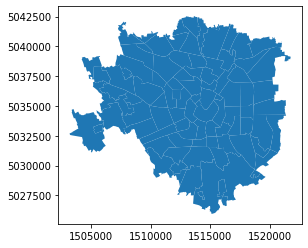

In [3]:
map_df.plot()

In [4]:
df = pd.read_csv("datiNil_2018.csv", sep=";")
df.head()

,Anno,Quartiere,NIL,Uomini,Donne,Totale,Famiglie,Total Spending Power
0,2018,Adriano,17,9.156,8.352,17.508,7739,"€ 284.098.690,00"
1,2018,Affori,80,12.690,12.651,25.341,12259,"€ 450.027.890,00"
2,2018,Baggio,55,14.282,15.735,30.017,15110,"€ 554.688.100,00"
3,2018,Bande Nere,52,20.405,24.171,44.576,22767,"€ 835.776.570,00"
4,2018,Barona,46,7.965,9.023,16.988,8042,"€ 295.221.820,00"


In [5]:
merged = map_df.set_index('ID_NIL').join(df.set_index('NIL'))
merged.head()

,FID_1,FID_1_1,NIL,AreaHA,AreaMQ,geometry,Anno,Quartiere,Uomini,Donne,Totale,Famiglie,Total Spending Power
ID_NIL,,,,,,,,,,,,,
74,0,0,SACCO,70.84658,7.084658e+05,"POLYGON ((1509552.719 5040303.761, 1509528.034...",2018,Sacco,150.000,112.000,262.000,135,"€ 4.955.850,00"
82,1,1,COMASINA,92.67346,9.267346e+05,"POLYGON ((1513215.689 5041192.971, 1513150.804...",2018,Comasina,4.764,4.852,9.616,4392,"€ 161.230.320,00"
75,2,2,STEPHENSON,56.00979,5.600979e+05,"POLYGON ((1510129.919 5039633.206, 1510161.469...",2018,Stephenson,69.000,49.000,118.000,56,"€ 2.055.760,00"
66,3,3,QT 8,102.44374,1.024437e+06,"POLYGON ((1511256.434 5036831.711, 1511232.849...",2018,QT 8,1.877,2.263,4.140,2006,"€ 73.640.260,00"
29,4,4,ORTOMERCATO,140.25196,1.402520e+06,"POLYGON ((1518588.948 5033641.932, 1518583.308...",2018,Ortomercato,2.181,2.109,4.290,2115,"€ 77.641.650,00"


In [6]:
for col in df.columns: 
    print(col) 

Anno
Quartiere
NIL
Uomini
Donne
Totale
Famiglie
Total Spending Power


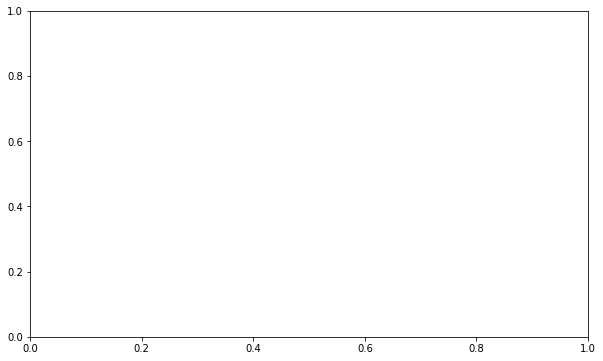

In [23]:
# set a variable that will call whatever column we want to visualise
variable = 'Total Spending Power'

# set the range for the choropleth
vmin, vmax = 120,220

# create figure and axes for the Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

In [24]:
# create map
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
# remove the axis
ax.axis('off')
# add a title
ax.set_title('Spending Power per NIL', fontdict={'fontsize': '25', 'fontweight':'3'})
# create an annotation for the data source
ax.annotate('Source: Elaboration on Open Data Milan 2018', xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

# create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues',
norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for the data range
sm._A = []

# add the colorbar the figure

cbar = fig.colorbar(sm)

<Figure size 432x288 with 0 Axes>

In [25]:
fig.savefig("Choropleth_NIL_2018.png", dpi=300)

I will upload this picture in my Capstone Project folder 

### Exploratory Analysis

In [44]:
df.describe()

,Anno,NIL,Uomini,Donne,Totale,Famiglie
count,88.0,88.000000,88.000000,88.000000,88.000000,88.000000
mean,2018.0,44.500000,62.685989,50.288091,75.046136,7902.636364
std,0.0,25.547342,169.938669,124.187957,178.806834,6546.487671
min,2018.0,1.000000,1.041000,0.000000,1.041000,2.000000
25%,2018.0,22.750000,6.020500,6.480500,11.202500,2087.750000
50%,2018.0,44.500000,9.071000,10.115000,18.238000,7432.000000
75%,2018.0,66.250000,15.542250,18.927000,31.686250,11537.000000
max,2018.0,88.000000,969.000000,729.000000,925.000000,31230.000000


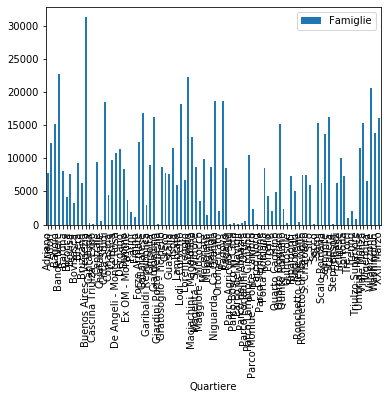

In [52]:
# a simple line plot to start
df.plot(kind='bar',x='Quartiere',y='Famiglie')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FFACD657C8>]],
      dtype=object)

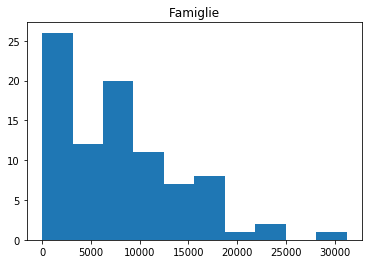

In [53]:
#Let's do an histogram to better understand the data
df.hist(column='Famiglie', grid=False,)

### All these information are going to be further elaborated in WEEK 5 and its final report